In [1]:
import os
import tarfile
import urllib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# get the data 
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

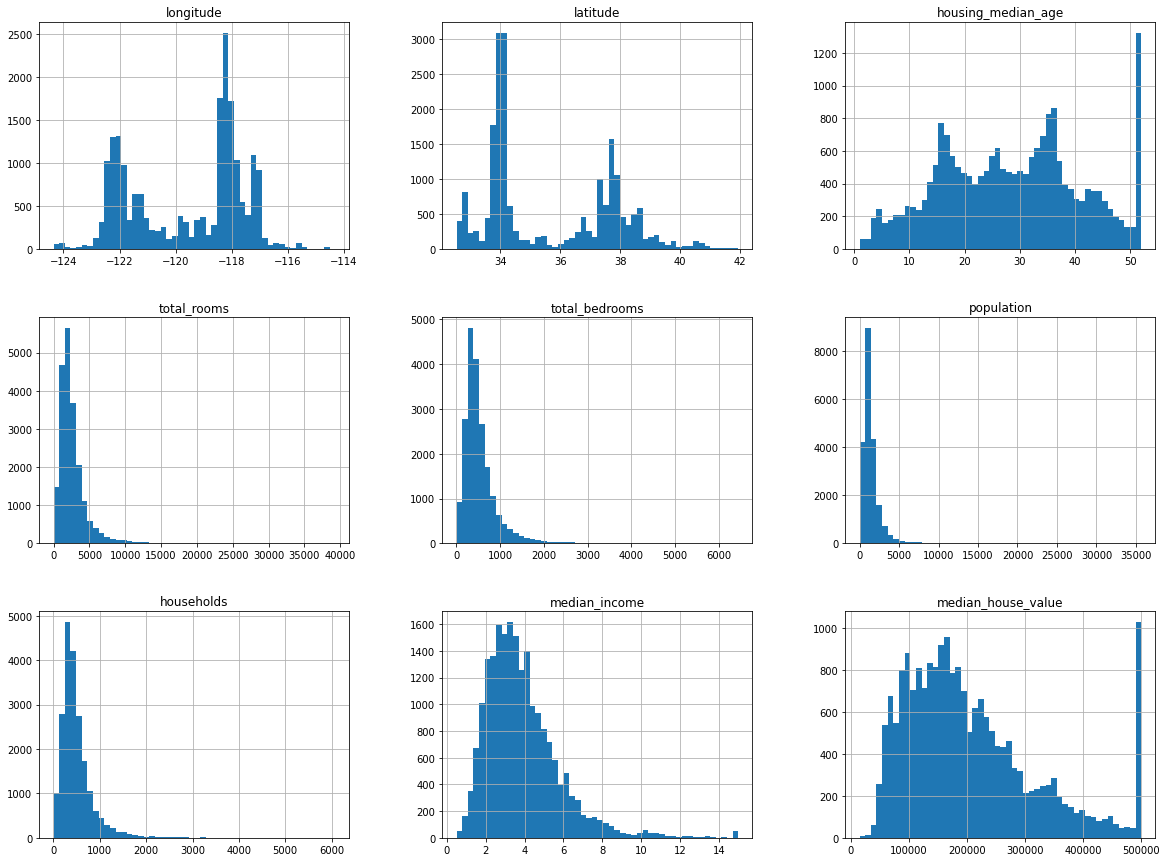

In [7]:
fig = housing.hist(bins=50, figsize=(20,15))

In [8]:
# custom train test split
def split_train_test(data, test_ratio):
    """
    return: training_set, test_set
    """
    
    # generate shuffled index 
    rand_indices = np.random.permutation(len(data))
    
    # split the indices into two parts
    test_size = int(len(data) * test_ratio)
    
    test_indices = rand_indices[:test_size]
    train_indices = rand_indices[test_size:]
    
    # assign training and test set their respective indices
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train, test = split_train_test(housing, 0.2)

In [10]:
print(train.shape, test.shape)

(16512, 10) (4128, 10)


In [11]:
housing['median_income_cat'] = pd.cut(housing['median_income'], bins=[0,1.5,3,4.5,6,np.inf], labels=[1,2,3,4,5])

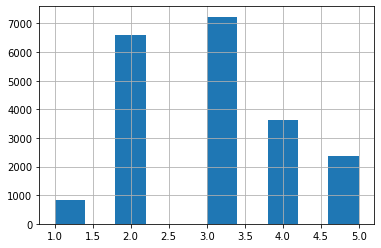

In [12]:
fig = housing['median_income_cat'].hist()

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
# perform Stratified Sampling
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing,housing['median_income_cat']):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]

In [16]:
# find the error of the 
train['median_income_cat'] = pd.cut(housing['median_income'], bins=[0,1.5,3,4.5,6,np.inf], labels=[1,2,3,4,5])

a = strat_train_set['median_income_cat'].value_counts() / len(strat_train_set)
b = housing['median_income_cat'].value_counts() / len(housing)
c = train['median_income_cat'].value_counts() / len(train)

In [17]:
pd.DataFrame({'housing':b,'strat_train':a,'train':c, 'strat_error(%)':100*(b-a), 'train_error(%)':(b-c)*100})

,housing,strat_train,train,strat_error(%),train_error(%)
3,0.350581,0.350594,0.351260,-0.001211,-0.067829
2,0.318847,0.318859,0.318556,-0.001211,0.029070
4,0.176308,0.176296,0.176235,0.001211,0.007267
5,0.114438,0.114402,0.113857,0.003634,0.058140
1,0.039826,0.039850,0.040092,-0.002422,-0.026647


In [18]:
for data in (strat_train_set, strat_test_set):
    data.drop('median_income_cat', axis=1, inplace=True)

In [19]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  median_income_cat   20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


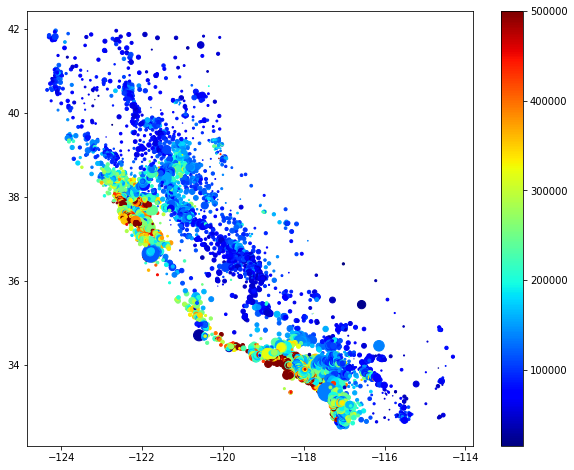

In [20]:
plt.figure(figsize=(10,8))

plt.scatter(x='longitude', y='latitude',data=housing,
            s=housing['population']/100, 
            c='median_house_value', cmap=plt.get_cmap('jet'))

fig = plt.colorbar()

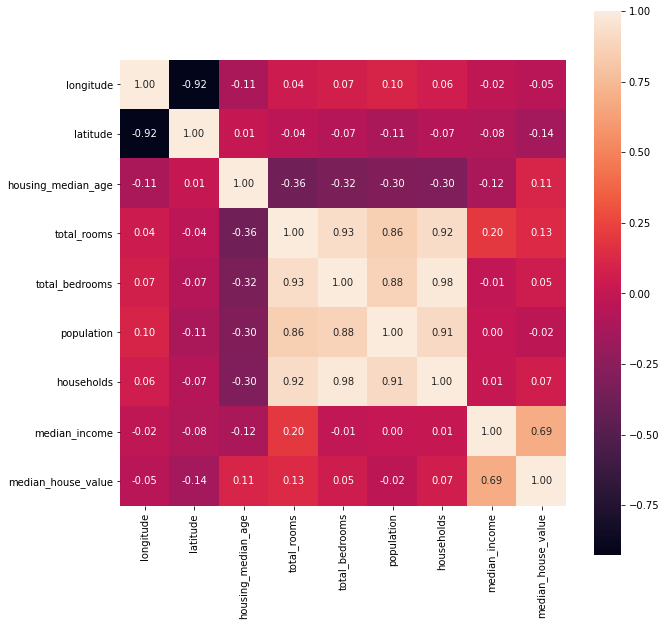

In [21]:
plt.figure(figsize=(10,10))

fig = sns.heatmap(housing.corr(),
            cbar=True,
            annot=True,
            square=True,
            fmt='.2f')

In [22]:
X_train = strat_train_set.drop('median_house_value', axis=1)
y_train = strat_train_set['median_house_value']

In [23]:
X_train['total_bedrooms'].fillna(X_train['total_bedrooms'].median(), inplace=True)

In [24]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [25]:
# find the numeric and categorical columns 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_col = X_train.select_dtypes(include=numerics).columns.tolist()
cat_col = X_train.select_dtypes(exclude=numerics).columns.tolist()

Too deal with `ocean_proximit`, the categorical column, the two popular methods are Ordinal Encoder and One Hot Encoder.

In [26]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
oe.fit_transform(X_train[cat_col])

array([[0.],
       [0.],
       [4.],
       ...,
       [1.],
       [0.],
       [3.]])

In [27]:
# what ordinal encoder is doing 
pd.DataFrame({'transformed':np.ravel(oe.fit_transform(X_train[cat_col])), 'original':X_train['ocean_proximity']})

,transformed,original
17606,0.0,<1H OCEAN
18632,0.0,<1H OCEAN
14650,4.0,NEAR OCEAN
3230,1.0,INLAND
3555,0.0,<1H OCEAN
...,...,...
6563,1.0,INLAND
12053,1.0,INLAND
13908,1.0,INLAND
11159,0.0,<1H OCEAN


In [28]:
# another way is to use onehotencoder 
from sklearn.preprocessing import OneHotEncoder 

# observe that default ohe returns a sparse matrix  
ohe = OneHotEncoder()
ohe.fit_transform(X_train[cat_col])

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [29]:
ohe.fit_transform(X_train[cat_col]).toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [30]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [31]:
# to put transforms together in a tidy way

from sklearn.base import BaseEstimator, TransformerMixin

class CustomTransform(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        return 
    
    def fit(self, data, y=None):
        return self
    
    def transform(self, data):
        rooms_per_household = data['total_rooms'] / data['households']
        bedrooms_per_household = data['total_bedrooms'] / data['households']
        population_per_household = data['population'] / data['households']
        
        return np.c_[data.drop(['total_rooms','total_bedrooms','population'], axis=1), 
                     rooms_per_household, bedrooms_per_household, population_per_household]
        

In [32]:
# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# model 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# model selection 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# metrics
from sklearn.metrics import mean_squared_error 


In [33]:
X_train = strat_train_set.drop('median_house_value', axis=1)
y_train = strat_train_set['median_house_value']

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value']

In [34]:
# numerical column pipeline
num_pipe = Pipeline([
    ('feature_transform', CustomTransform()),
    ('imputer', SimpleImputer(strategy='median')),
    ('Standard_scaler', StandardScaler())
])

# categorical column pipeline
cat_pipe = Pipeline([
    ('onehot', OneHotEncoder())
])

# putting it together
preprocessor = ColumnTransformer([
    ('num', num_pipe, num_col),
    ('cat', cat_pipe, cat_col)
])

# first model 
model = DecisionTreeRegressor()

# full pipeline, preprocessor + model
full_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

In [35]:
_ = full_pipe.fit(X_train, y_train)

In [36]:
predictions = full_pipe.predict(X_train)
mse_train = mean_squared_error(y_train,predictions)
print('MSE_Train:', mse_train)

MSE_Train: 0.0


There is no error in the training set. This means that the decision tree overfits the training data, learning everything from it. Thus the model is not likely to perform well on the test set. Let's see.

In [37]:
test_predictions = full_pipe.predict(X_test)
mse_test = mean_squared_error(y_test,test_predictions)
print('MSE_Test:', mse_test)

MSE_Test: 5048714937.929991


Thus we cannot trust the model performance on the training set. What we'd like to do next is to improve our model. We can't improve the model by using the test set, since that would result in our model fitting well just for this particular test set. Instead, we should do cross validation.

In [38]:
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]

model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']

observations = pd.DataFrame()


for i in range(len(models)):
    full_pipe = Pipeline([('preprocessor', preprocessor),('model', models[i])])
    scores = cross_val_score(full_pipe, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    rmse = np.sqrt(-scores)
    observations[model_names[i]] = rmse 
    
# if we just take the mean as our predictor, what's the rmse? 
mse_baseline = mean_squared_error(y_train, [np.mean(y_train) for i in range(len(y_train))])
rmse_baseline = np.sqrt(mse_baseline)    
    
observations['Baseline'] = rmse_baseline

In [39]:
observations = observations.append(observations.mean(axis=0), ignore_index=True).T
observations.columns = ['CV1','CV2','CV3','CV4','CV5','mean']
observations

,CV1,CV2,CV3,CV4,CV5,mean
Linear Regression,69512.248952,71692.385294,73927.133162,69591.080944,73026.256449,71549.820960
Decision Tree,69044.266862,71077.342874,74571.507883,68165.376568,72532.695083,71078.237854
Random Forest,48714.960929,51501.407620,51615.164740,48474.980235,51940.604324,50449.423570
Baseline,115699.511173,115699.511173,115699.511173,115699.511173,115699.511173,115699.511173


It seems like Random Forest is the best model so far. Let's see if we can further improve the performance of Random Forest by tuning its hyperparameters.

In [40]:
# gridsearchCV for RF

rfr = RandomForestRegressor()
rfr_pipe = Pipeline([('preprocessor', preprocessor),('model', rfr)])

param_grid = [
    {'model__n_estimators':[3,10,30], 'model__max_features':[2,4,6,8]},
    {'model__bootstrap':[False],'model__n_estimators':[3,10], 'model__max_features':[2,4,6]}
]

grid_search = GridSearchCV(rfr_pipe, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

_ = grid_search.fit(X_train, y_train)

In [41]:
cv_results = grid_search.cv_results_

for i, j in zip(cv_results['mean_test_score'], cv_results['params']):
    print(j, np.sqrt(-i))

{'model__max_features': 2, 'model__n_estimators': 3} 59542.718996744195
{'model__max_features': 2, 'model__n_estimators': 10} 52535.83991927332
{'model__max_features': 2, 'model__n_estimators': 30} 49743.050030990504
{'model__max_features': 4, 'model__n_estimators': 3} 58467.44219932134
{'model__max_features': 4, 'model__n_estimators': 10} 51146.00336223235
{'model__max_features': 4, 'model__n_estimators': 30} 48875.33005193655
{'model__max_features': 6, 'model__n_estimators': 3} 58741.22336379845
{'model__max_features': 6, 'model__n_estimators': 10} 51105.26821562413
{'model__max_features': 6, 'model__n_estimators': 30} 49235.42902825469
{'model__max_features': 8, 'model__n_estimators': 3} 57760.900918694606
{'model__max_features': 8, 'model__n_estimators': 10} 52042.56700119593
{'model__max_features': 8, 'model__n_estimators': 30} 49736.87514412908
{'model__bootstrap': False, 'model__max_features': 2, 'model__n_estimators': 3} 58017.94931587677
{'model__bootstrap': False, 'model__max

In [43]:
# try randomzied grid search
rd_grid_search = RandomizedSearchCV(rfr_pipe, param_grid, cv=5, n_iter = 10,
                                    scoring='neg_mean_squared_error', return_train_score=True)

_ = rd_grid_search.fit(X_train, y_train)

In [44]:
rcv_results = rd_grid_search.cv_results_

for i, j in zip(rcv_results['mean_test_score'], rcv_results['params']):
    print(j, np.sqrt(-i))

{'model__n_estimators': 30, 'model__max_features': 8} 49987.21411889482
{'model__n_estimators': 3, 'model__max_features': 6, 'model__bootstrap': False} 55795.03954255001
{'model__n_estimators': 3, 'model__max_features': 2} 59965.29979608096
{'model__n_estimators': 10, 'model__max_features': 2, 'model__bootstrap': False} 51263.552519923425
{'model__n_estimators': 10, 'model__max_features': 8} 52058.50306976703
{'model__n_estimators': 3, 'model__max_features': 4} 57811.7547304215
{'model__n_estimators': 30, 'model__max_features': 2} 49600.366144789616
{'model__n_estimators': 10, 'model__max_features': 4} 51279.04620552064
{'model__n_estimators': 10, 'model__max_features': 2} 52596.17921320198
{'model__n_estimators': 3, 'model__max_features': 4, 'model__bootstrap': False} 55900.79677315417


In [45]:
# find important features

# when using a pipeline, need to specify _final_estimator

feature_importances = grid_search.best_estimator_._final_estimator.feature_importances_

In [46]:
# find the respective columns
final_cols = num_col.copy()

for i in ['total_rooms','total_bedrooms','population']:
    final_cols.remove(i)
    
final_cols += ['rooms_per_household', 'bedrooms_per_household', 'population_per_household']
final_cols += ohe.categories_[0].tolist()

In [47]:
# order them DESC 
feature_importances_lst = list(zip(final_cols, feature_importances))
feature_importances_lst.sort(key=lambda x:x[1], reverse=True)

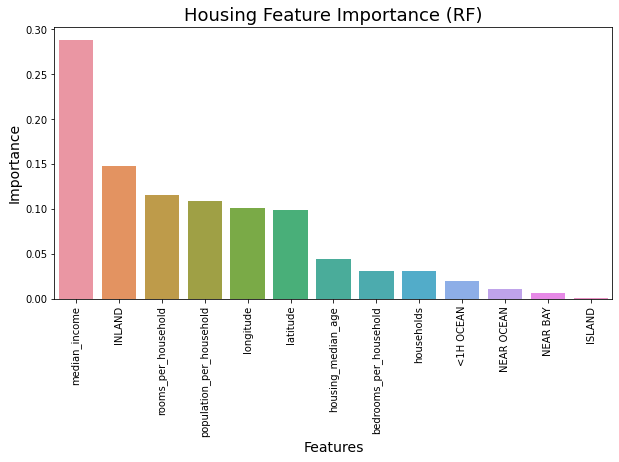

In [48]:
plt.figure(figsize=(10,5))
fig = sns.barplot(x = [i[0] for i in feature_importances_lst], y=[i[1] for i in feature_importances_lst])
fig = plt.xticks(rotation=90)
fig = plt.xlabel('Features', fontsize=14)
fig = plt.ylabel('Importance', fontsize=14)
fig = plt.title('Housing Feature Importance (RF)', fontsize=18)

Now that we've seen the best performers, let's carry out the final model.

In [49]:
final_model = grid_search.best_estimator_

_ = final_model.fit(X_train, y_train)

In [50]:
y_pred_test = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, y_pred_test)
final_rmse = np.sqrt(final_mse)

print('final_rmse:', final_rmse)

final_rmse: 46724.180453320805


In [51]:
# 95% confidence interval for final_rmse

from scipy import stats

squared_errors_array = (y_test - y_pred_test)**2 

In [53]:
interval_mse = stats.t.interval(
                alpha=0.95,                        # confidence level
                df=len(squared_errors_array)-1,          # degree of freedom
                loc=np.mean(squared_errors_array), # sample mean
                scale=stats.sem(squared_errors_array))  # standard error σ/sqrt(n)

interval_rmse = np.sqrt(interval_mse)
interval_rmse

array([44783.2185709 , 48587.66728811])

If the experts estimates are generally off by 20%, then we can compare our model performance to experts' predictions.

In [54]:
# experts' estimate are off by 20%

print('expert prediction rmse:', np.sqrt(mean_squared_error(y_test, y_test*1.2)))

expert prediction rmse: 47158.323700961744


Our model performed similar to that of the experts, which is not a bad thing. Afterall, hiring experts to predict the prices can be costly. Or the experts can have more free time doing something else interesting.